# Data Understanding
For each subsection will b specified:
 - the related issue: e.g. (`#3`)
 - the assignee (`djanloo`, `tommy`)

| Task | Issue | Assignee |
| ----:| -----:| --------:|
| **semantics**   | `#4`| `djanloo` |
| **distribution** | `#4`| `djanloo` |
| **quality**    | `#5`| `tommy`  |
| **transformations**    | `#5`| `tommy`  |
| **correlations**    | `#4`| `djanloo`  |

In [30]:
# Imports and preliminary stuff
import pandas as pd
import numpy as np

df = pd.read_csv("ravdess_features.csv")
# Set to display all fields
pd.set_option('display.max_rows', 10, 'display.max_columns', None)
display(df.head())

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,channels,sample_width,frame_rate,frame_width,length_ms,frame_count,intensity,zero_crossings_sum,mfcc_mean,mfcc_std,mfcc_min,mfcc_max,sc_mean,sc_std,sc_min,sc_max,sc_kur,sc_skew,stft_mean,stft_std,stft_min,stft_max,stft_kur,stft_skew,mean,std,min,max,kur,skew
0,audio-only,speech,fearful,normal,Dogs are sitting by the door,2nd,2.0,F,1,2,48000,2,3737,179379.0,-36.793432,16995,-33.485947,134.654860,-755.22345,171.69092,5792.550744,3328.055457,0.0,13541.959028,-1.120769,0.250940,0.415250,0.335533,0.0,1.0,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
1,audio-only,speech,angry,normal,Dogs are sitting by the door,1st,16.0,F,1,2,48000,2,3904,187387.0,NaN,13906,-29.502108,130.485630,-713.98560,205.00770,5197.620555,4040.931570,0.0,12000.290443,-1.531204,0.219582,0.417488,0.352380,0.0,1.0,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
2,audio-only,NaN,happy,strong,Dogs are sitting by the door,2nd,16.0,F,1,2,48000,2,4671,224224.0,-32.290737,18723,-30.532463,126.577110,-726.06036,165.45653,4830.743037,3332.131300,0.0,12007.751173,-1.130153,0.436699,0.379758,0.352270,0.0,1.0,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,0.166351,4.881241,0.302659
3,audio-only,NaN,surprised,normal,Kids are talking by the door,1st,14.0,F,1,2,48000,2,3637,174575.0,-49.019839,11617,-36.059555,159.725160,-842.94635,190.03609,5376.446478,4053.663073,0.0,12048.223893,-1.497765,0.098802,0.407277,0.360552,0.0,1.0,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014
4,audio-only,song,happy,strong,Dogs are sitting by the door,2nd,2.0,F,1,2,48000,2,4404,211411.0,-31.214503,15137,-31.405996,122.125824,-700.70276,161.13400,5146.012474,3442.724109,0.0,12025.582707,-1.167544,0.496066,0.415974,0.350655,0.0,1.0,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872


### Semantics

See report for variables meaning.

for values characterization we try with boxplots an statistics.

In [48]:
stats = df.describe()

print(f"Dataset has {len(df.columns)} features")

# Print fields with missing values
print("Missing values:")
for field in stats.columns:
    missing_ratio = 1 - stats[field]["count"] / len(df) 
    if missing_ratio > 0.0:
        print(f"Field {field:>10}: {missing_ratio*100:.1f}%  of missing ")
print()
# Check for field that have only one value
print("Features that have only one value:")
for field in stats.columns:
    if stats[field]["min"] == stats[field]["max"]:
        print(f"- {field}")


Dataset has 38 features
Missing values:
Field      actor: 45.9%  of missing 
Field  intensity: 33.3%  of missing 

Features that have only one value:
- sample_width
- frame_rate
- stft_max


From this we can conclude that:
- `sample_width`
- `frame_rate`
- `stft_max`

are **useless** features, since they are equal for everyone.

Furthermore, `actor` field has almost 50% of missing values, so it is higly probable that it will be useless too.

In [51]:
# Remove useless features
df.drop(columns = ["sample_width", "frame_rate", "stft_max"], inplace=True)

NameError: name 'plt' is not defined

/home/djanloo/.local/share/virtualenvs/dynamiting-oYIjB6ZE/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


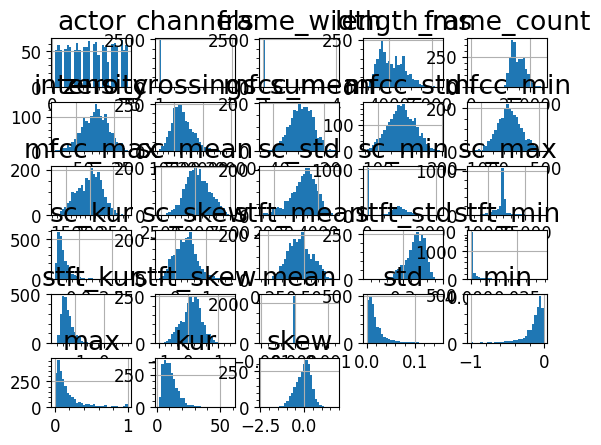

In [56]:
# pd.plotting.boxplot(np.log(df.zero_crossings_sum))

df.hist(bins=int(4*np.log(len(df))))
print()

### Distribution

### Quality

### Transformations

### Correlations